<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/CV_LAB9(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

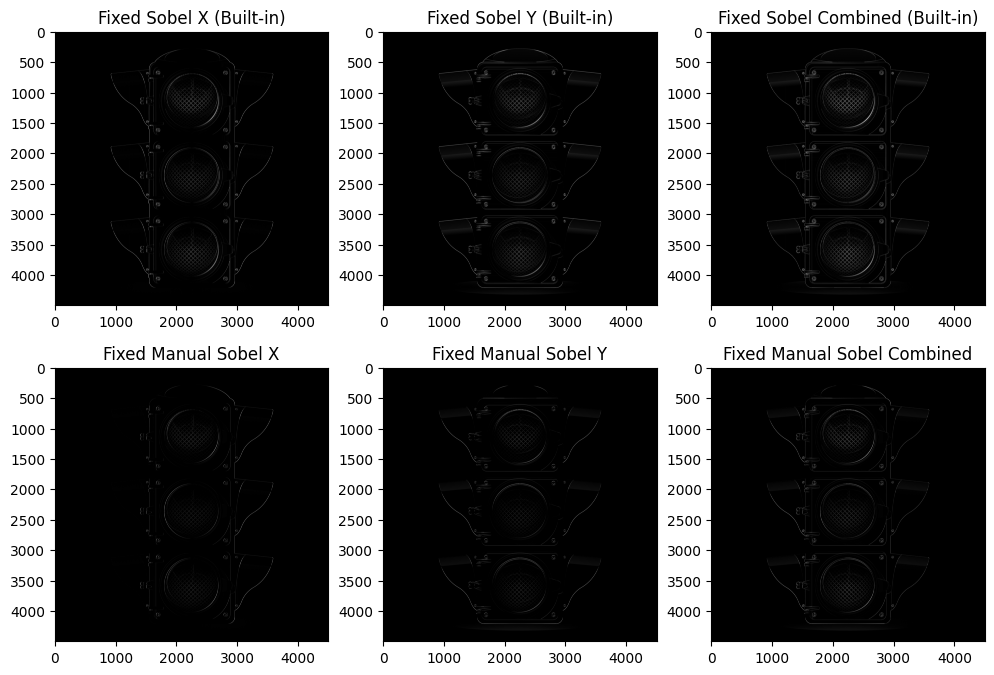

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Traffic Sign Image
img = cv2.imread("/content/4985.jpg", cv2.IMREAD_GRAYSCALE)

# 🔹 Built-in Sobel Operator (Fixed)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert to uint8 (fixing error)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = np.uint8(sobel_combined)  # Convert before applying convertScaleAbs
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# 🔹 User-defined Sobel Operator (Fixed)
def sobel_edge_detection(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Horizontal
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Vertical

    sobel_x_manual = cv2.filter2D(image, -1, kernel_x)
    sobel_y_manual = cv2.filter2D(image, -1, kernel_y)
    sobel_combined_manual = np.sqrt(sobel_x_manual.astype(np.float32)**2 + sobel_y_manual.astype(np.float32)**2)

    # Convert to uint8 before using convertScaleAbs
    sobel_x_manual = cv2.convertScaleAbs(sobel_x_manual)
    sobel_y_manual = cv2.convertScaleAbs(sobel_y_manual)
    sobel_combined_manual = np.uint8(sobel_combined_manual)  # Fix: Convert before applying convertScaleAbs
    sobel_combined_manual = cv2.convertScaleAbs(sobel_combined_manual)

    return sobel_x_manual, sobel_y_manual, sobel_combined_manual

sobel_x_manual, sobel_y_manual, sobel_combined_manual = sobel_edge_detection(img)

# Display Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title("Fixed Sobel X (Built-in)")
plt.subplot(2, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title("Fixed Sobel Y (Built-in)")
plt.subplot(2, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title("Fixed Sobel Combined (Built-in)")
plt.subplot(2, 3, 4), plt.imshow(sobel_x_manual, cmap='gray'), plt.title("Fixed Manual Sobel X")
plt.subplot(2, 3, 5), plt.imshow(sobel_y_manual, cmap='gray'), plt.title("Fixed Manual Sobel Y")
plt.subplot(2, 3, 6), plt.imshow(sobel_combined_manual, cmap='gray'), plt.title("Fixed Manual Sobel Combined")
plt.show()


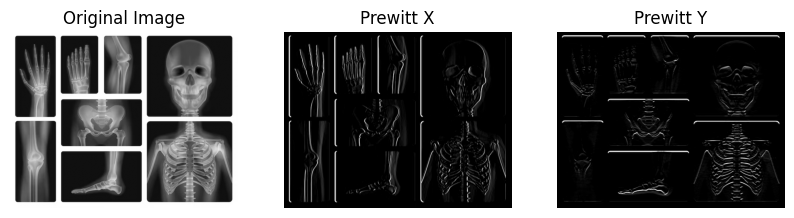

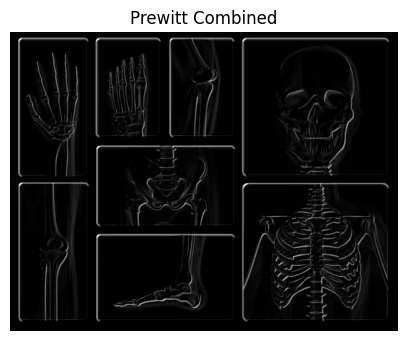

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the correct path to the uploaded file
image_path = "/content/human-bones-realistic-x-ray-shots_1284-29690.png"

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    raise ValueError("Error: Image not loaded properly. Check the file path.")

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Define Prewitt kernels
prewitt_x_kernel = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])

prewitt_y_kernel = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

# Apply Prewitt operator using filter2D
prewitt_x = cv2.filter2D(img, -1, prewitt_x_kernel)
prewitt_y = cv2.filter2D(img, -1, prewitt_y_kernel)
prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Display Prewitt X
plt.subplot(1, 3, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X")
plt.axis("off")

# Display Prewitt Y
plt.subplot(1, 3, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y")
plt.axis("off")

plt.show()

# Display combined Prewitt result
plt.figure(figsize=(5, 5))
plt.imshow(prewitt_combined, cmap='gray')
plt.title("Prewitt Combined")
plt.axis("off")
plt.show()


<ipython-input-15-63468661a25b>:37: RuntimeWarning: overflow encountered in scalar subtract
  gy = image[i + 1, j] - image[i, j + 1]  # Gradient in Y direction
<ipython-input-15-63468661a25b>:36: RuntimeWarning: overflow encountered in scalar subtract
  gx = image[i, j] - image[i + 1, j + 1]  # Gradient in X direction
<ipython-input-15-63468661a25b>:38: RuntimeWarning: overflow encountered in scalar add
  edge_image[i, j] = np.sqrt(gx**2 + gy**2)  # Magnitude


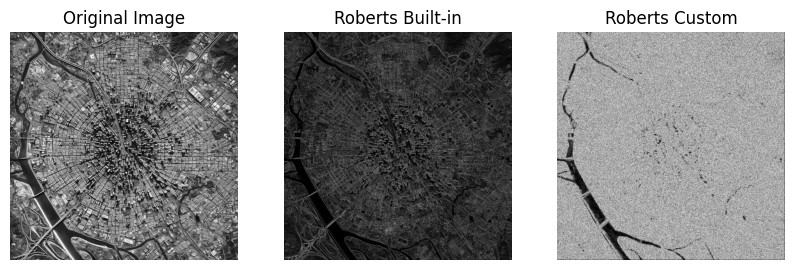

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image in grayscale
image_path = "/content/DALL·E 2025-03-28 13.09.30 - A low-resolution satellite image of an urban landscape. The image should show buildings, roads, and some green patches, captured from a high-altitude .webp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Display original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# 1️⃣ **Built-in Roberts Edge Detection using OpenCV**
roberts_x = np.array([[1, 0], [0, -1]])  # Roberts cross operator (X)
roberts_y = np.array([[0, 1], [-1, 0]])  # Roberts cross operator (Y)

edge_x = convolve(img.astype(float), roberts_x)
edge_y = convolve(img.astype(float), roberts_y)
roberts_builtin = np.sqrt(edge_x**2 + edge_y**2)  # Combine both directions

# 2️⃣ **User-Defined Roberts Operator**
def roberts_operator(image):
    rows, cols = image.shape
    edge_image = np.zeros_like(image, dtype=float)

    for i in range(rows - 1):
        for j in range(cols - 1):
            gx = image[i, j] - image[i + 1, j + 1]  # Gradient in X direction
            gy = image[i + 1, j] - image[i, j + 1]  # Gradient in Y direction
            edge_image[i, j] = np.sqrt(gx**2 + gy**2)  # Magnitude

    return np.uint8(edge_image)

roberts_custom = roberts_operator(img)

# Display Results
plt.subplot(1, 3, 2)
plt.imshow(roberts_builtin, cmap='gray')
plt.title("Roberts Built-in")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(roberts_custom, cmap='gray')
plt.title("Roberts Custom")
plt.axis("off")

plt.show()

The Roberts operator has several limitations when applied to real-world satellite images:

Sensitivity to Noise – The Roberts operator uses small 2×2 kernels, making it highly sensitive to noise. Satellite images often contain atmospheric distortions, sensor noise, and compression artifacts, which can lead to inaccurate edge detection.
Poor Detection of Fine Details – Since it focuses on diagonal differences, the Roberts operator may fail to capture fine details, subtle edges, or low-contrast boundaries in complex urban landscapes, reducing its effectiveness in high-detail satellite images.
For better edge detection in real-world satellite imagery, more advanced operators like Sobel, Canny, or Laplacian are preferred.

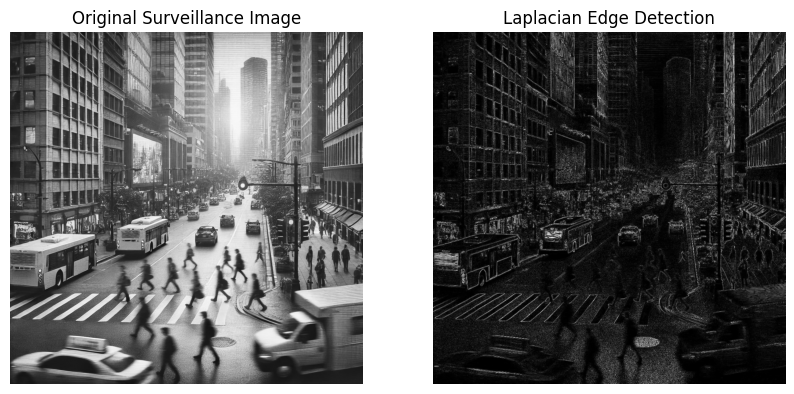

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the generated surveillance image
image_path = "/content/DALL·E 2025-03-28 13.14.24 - A realistic surveillance camera image of an urban street with people walking, vehicles moving, and buildings in the background. The image should have .webp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    raise ValueError("Failed to load the surveillance image.")

# Apply Laplacian operator for edge detection
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Display results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Surveillance Image")
plt.axis("off")

# Laplacian Edge Detection
plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.show()

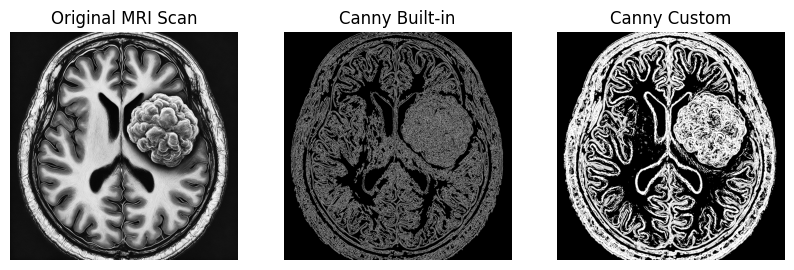

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI scan image with a brain tumor
image_path = "/content/-------.webp"
mri_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply built-in Canny edge detection
canny_builtin = cv2.Canny(mri_image, 50, 150)

# Define a user-defined function for Canny edge detection
def custom_canny(image, low_threshold, high_threshold):
    # Step 1: Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

    # Step 2: Compute gradients using Sobel operator
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)

    # Step 3: Non-Maximum Suppression (simplified)
    edges = np.zeros_like(image)
    edges[magnitude > low_threshold] = 255

    return edges

# Apply custom Canny edge detection
canny_custom = custom_canny(mri_image, 50, 150)

# Display the results
plt.figure(figsize=(10, 5))

# Original MRI Image
plt.subplot(1, 3, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Original MRI Scan")
plt.axis("off")

# Built-in Canny
plt.subplot(1, 3, 2)
plt.imshow(canny_builtin, cmap='gray')
plt.title("Canny Built-in")
plt.axis("off")

# Custom Canny
plt.subplot(1, 3, 3)
plt.imshow(canny_custom, cmap='gray')
plt.title("Canny Custom")
plt.axis("off")

plt.show()